<a href="https://colab.research.google.com/github/ramyasnl/Machine_Learning_Beginners_MS/blob/main/pumpkin_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


## Introduction
Now that you are set up with the tools you need to start tackling machine learning model building with Scikit-learn, you are ready to start asking questions of your data. As you work with data and apply ML solutions, it's very important to understand how to ask the right question to properly unlock the potentials of your dataset.

## In this lesson, you will learn:

1.How to prepare your data for model-building.</br>
2.How to use Matplotlib for data visualization.</br>
Asking the right question of your data,</br>
The question you need answered will determine what type of ML algorithms you will leverage. And the quality of the answer you get back will be heavily dependent on the nature of your data.

Take a look at the data provided for this lesson. You can open this .csv file in VS Code. A quick skim immediately shows that there are blanks and a mix of strings and numeric data. There's also a strange column called 'Package' where the data is a mix between 'sacks', 'bins' and other values. The data, in fact, is a bit of a mess.

In fact, it is not very common to be gifted a dataset that is completely ready to use to create a ML model out of the box. In this lesson, you will learn how to prepare a raw dataset using standard Python libraries. You will also learn various techniques to visualize the data.

## Case study: 'the pumpkin market'
In this folder you will find a .csv </br>
https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv </br>
 file in the root data folder called US-pumpkins.csv which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

In [2]:
columns=['CityName','Type','Package','Variety','SubVariety','Grade','Date','LowPrice','HighPrice','MostlyLow','MostlyHigh','Origin','OriginDistrict']

In [3]:
# Trying to read the data from github which didnt work well 
data_url = 'https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv'
raw_data = pd.read_csv(data_url, names = columns)
raw_data.head()

,CityName,Type,Package,Variety,SubVariety,Grade,Date,LowPrice,HighPrice,MostlyLow,MostlyHigh,Origin,OriginDistrict
0,<!DOCTYPE html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<html lang=""en"" data-color-mode=""auto"" data-li...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<head>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"<meta charset=""utf-8"">",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"<link rel=""dns-prefetch"" href=""https://githu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pip install pyspark

     |████████████████████████████████| 212.4 MB 67 kB/s 
     |████████████████████████████████| 198 kB 47.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=71b8582e769742969d4eefac46c89d6f7c69d2009c1e9a4068595c37a7c98e09
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


# Data can be directly read from github ,use the raw data button in the data page and copy the link .

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv', error_bad_lines=False)
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [6]:
# Just another example of reading another file 
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The Pumpkin Market
In this folder you will find a .csv file in the root data folder called US-pumpkins.csv which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

## Preparing data
This data is in the public domain. It can be downloaded in many separate files, per city, from the USDA web site. To avoid too many separate files, we have concatenated all the city data into one spreadsheet, thus we have already prepared the data a bit. Next, let's take a closer look at the data.

## The pumpkin data - early conclusions
What do you notice about this data? You already saw that there is a mix of strings, numbers, blanks and strange values that you need to make sense of.

## What question can you ask of this data, using a Regression technique?
 What about "Predict the price of a pumpkin for sale during a given month". Looking again at the data, there are some changes you need to make to create the data structure necessary for the task.

In [7]:
# If you look at the Package column, pumpkins are sold in many different configurations. 
# Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

# Pumpkins seem very hard to weigh consistently

# Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'.
#  Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

In [8]:
pumpkins = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv', error_bad_lines=False)
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,15.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,18.0,DELAWARE,NaN,sml,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,18.0,DELAWARE,NaN,sml,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,17.0,OHIO,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,15.0,DELAWARE,NaN,NaN,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [9]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        415 non-null    object 
 1   Type             9 non-null      object 
 2   Package          415 non-null    object 
 3   Variety          415 non-null    object 
 4   Sub Variety      248 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             415 non-null    object 
 7   Low Price        415 non-null    float64
 8   High Price       415 non-null    float64
 9   Mostly Low       391 non-null    float64
 10  Mostly High      391 non-null    float64
 11  Origin           415 non-null    object 
 12  Origin District  19 non-null     object 
 13  Item Size        301 non-null    object 
 14  Color            270 non-null    object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     11 non-null     object 
 17  Quality       

## Linear Regression for Pumpkins

## Check if there is missing data in the current dataframe:

In [10]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [11]:
# A set of new columns for a new dataframe. Filter out nonmatching columns
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

# Get an average between low and high price for the base pumpkin price
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
# First, check for missing dates
# You will first need to take steps to check for missing dates:

# Convert the dates to a month format (these are US dates, so the format is MM/DD/YYYY).
# Extract the month to a new column.

# Convert the date to its month only
month = pd.DatetimeIndex(pumpkins['Date']).month

# Create a new dataframe with this basic data
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
# But wait! There's one more thing to do
# Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

# Add these lines after the block creating the new_pumpkins dataframe:
# Convert the price if the Package contains fractional bushel values
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


In [12]:
new_pumpkins.head(10)

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.500
71,9,1 1/9 bushel cartons,18.0,18.0,16.200
72,10,1 1/9 bushel cartons,18.0,18.0,16.200
73,10,1 1/9 bushel cartons,17.0,17.0,15.300
74,10,1 1/9 bushel cartons,15.0,15.0,13.500
75,10,1 1/9 bushel cartons,18.0,18.0,16.200
76,10,1 1/9 bushel cartons,17.0,17.0,15.300
77,10,1 1/9 bushel cartons,17.0,18.5,15.975
78,10,1 1/9 bushel cartons,15.0,15.0,13.500
79,10,1 1/9 bushel cartons,17.0,17.0,15.300


✅ According to The Spruce Eats, a bushel's weight depends on the type of produce, as it's a volume measurement. "A bushel of tomatoes, for example, is supposed to weigh 56 pounds... Leaves and greens take up more space with less weight, so a bushel of spinach is only 20 pounds." It's all pretty complicated! Let's not bother with making a bushel-to-pound conversion, and instead price by the bushel. All this study of bushels of pumpkins, however, goes to show how very important it is to understand the nature of your data!

Now, you can analyze the pricing per unit based on their bushel measurement. If you print out the data one more time, you can see how it's standardized.

✅ Did you notice that pumpkins sold by the half-bushel are very expensive? Can you figure out why? Hint: little pumpkins are way pricier than big ones, probably because there are so many more of them per bushel, given the unused space taken by one big hollow pie pumpkin.

In [13]:
new_pumpkins.tail(10)


,Month,Package,Low Price,High Price,Price
1733,9,1/2 bushel cartons,13.75,15.0,28.75
1734,9,1/2 bushel cartons,10.75,15.0,25.75
1735,9,1/2 bushel cartons,12.00,12.0,24.00
1736,9,1/2 bushel cartons,12.00,12.0,24.00
1737,9,1/2 bushel cartons,15.00,15.0,30.00
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


## Visualization Strategies
Part of the data scientist's role is to demonstrate the quality and nature of the data they are working with. To do this, they often create interesting visualizations, or plots, graphs, and charts, showing different aspects of data. In this way, they are able to visually show relationships and gaps that are otherwise hard to uncover.

Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.

One data visualization libary that works well in Jupyter notebooks is Matplotlib 

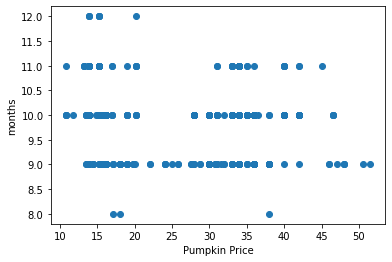

In [14]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.ylabel("months")
plt.xlabel("Pumpkin Price")
plt.show()

Text(0, 0.5, 'Pumpkin Price')

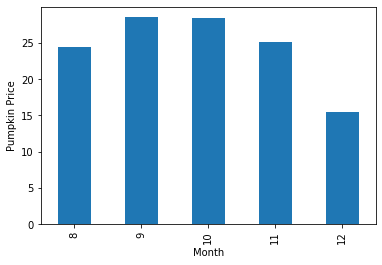

In [15]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

## 🚀Challenge
Explore the different types of visualization that Matplotlib offers. Which types are most appropriate for regression problems?

In [16]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = new_pumpkins.groupby(['Month', 'Price']).size().reset_index(name='counts')
df_counts.head()
# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df_counts.Price, df_counts.Month, size= df_counts.Price, ax=ax)

# # Decorations
# plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
# plt.show()

,Month,Price,counts
0,8,17.10,1
1,8,18.00,1
2,8,38.00,1
3,9,13.50,2
4,9,13.95,2


In [17]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   82 non-null     int64  
 1   Price   82 non-null     float64
 2   counts  82 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


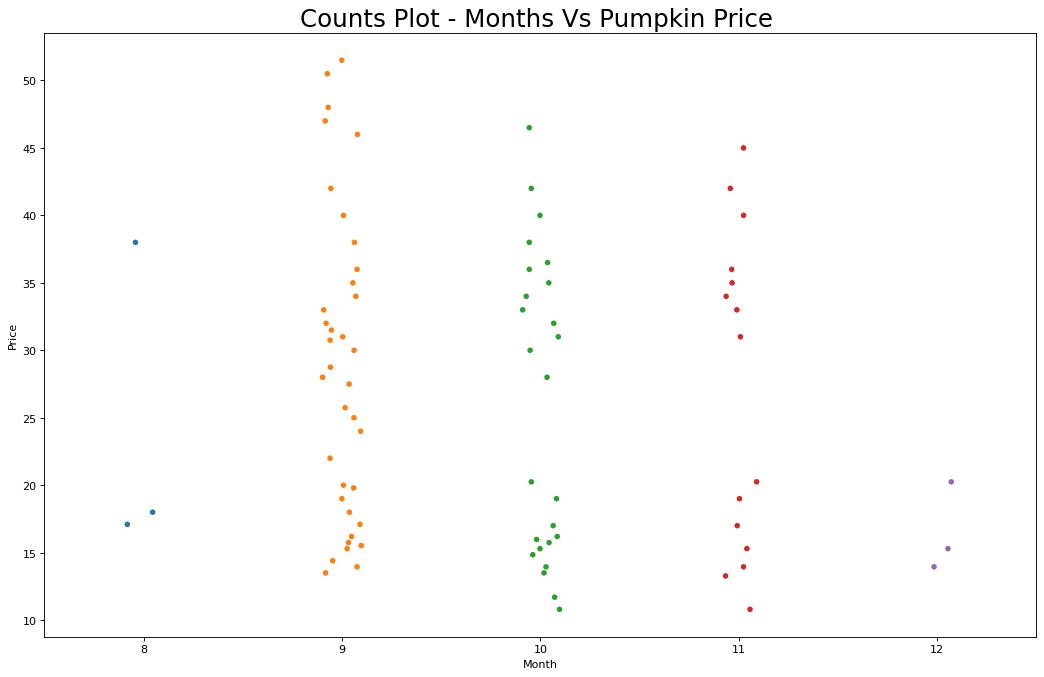

In [18]:
# # Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot( df_counts.Month,df_counts.Price,ax=ax)

# # Decorations
plt.title('Counts Plot - Months Vs Pumpkin Price ', fontsize=22)
plt.show()

### https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python
x = np.array([1, 3, 5, 7])
generate data

y = np.array([ 6, 3, 9, 5 ])
plt.plot(x, y, 'o')
create scatter plot


m, b = np.polyfit(x, y, 1)
m = slope, b=intercept


plt.plot(x, m*x + b)
add line of best fit



In [28]:
new_pumpkins.Month

70       9
71       9
72      10
73      10
74      10
        ..
1738     9
1739     9
1740     9
1741     9
1742     9
Name: Month, Length: 415, dtype: int64

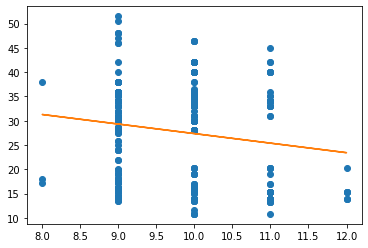

In [30]:
import numpy as np 
x = new_pumpkins.Month  #generate data

y = new_pumpkins.Price
plt.plot(x, y, 'o') #create scatter plot
m, b = np.polyfit(x, y, 1)# m = slope, b=intercept
plt.plot(x, m*x + b) #add line of best fit